In [6]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import csv
import os
plt.style.use('fivethirtyeight')

### Reading job data files and cleaning the data 

In [3]:
# Change working directory
os.chdir('../Data')

In [7]:
df_jobs=pd.read_csv('Monster_LA_Licensed_vocational_nurses_Scraped_Data_20_18_11_15_2018.csv')
df_jobs_1=pd.read_csv('Monster_Sacramento_Licensed_vocational_nurses_Scraped_Data_16_41_12_24_2018.csv')
df_jobs_2=pd.read_csv('Monster_Fresno_Licensed_vocational_nurses_Scraped_Data_22_37_12_24_2018.csv')
df_jobs_3=pd.read_csv('Monster_SD_Licensed_vocational_nurses_Scraped_Data_02_00_12_24_2018.csv')
df_jobs_4=pd.read_csv('Monster_SF_Licensed_vocational_nurses_Scraped_Data_19_42_12_24_2018.csv')

In [8]:
df_jobs_1.drop(df_jobs_1.columns[0],axis=1,inplace=True)
df_jobs_1.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_2.drop(df_jobs_2.columns[0],axis=1,inplace=True)
df_jobs_2.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_3.drop(df_jobs_3.columns[0],axis=1,inplace=True)
df_jobs_3.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_4.drop(df_jobs_4.columns[0],axis=1,inplace=True)
df_jobs_4.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs.drop(df_jobs.columns[0],axis=1,inplace=True)
df_jobs.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)

In [9]:
df_jobs = df_jobs[df_jobs['Job_name']!='Error loading']
df_jobs_1 = df_jobs_1[df_jobs_1['Job_name']!='Error loading']
df_jobs_2 = df_jobs_2[df_jobs_2['Job_name']!='Error loading']
df_jobs_3 = df_jobs_3[df_jobs_3['Job_name']!='Error loading']
df_jobs_4 = df_jobs_4[df_jobs_4['Job_name']!='Error loading']

In [10]:
df_jobs=df_jobs.append(df_jobs_1)
df_jobs=df_jobs.append(df_jobs_2)
df_jobs=df_jobs.append(df_jobs_3)
df_jobs=df_jobs.append(df_jobs_4)

In [12]:
df_jobs.head()

Job_name  \
0  Travel Licensed Practical Nurse LPN Skilled Nu...   
1                                 LVN Regional Float   
2                      Licensed Vocational Nurse LVN   
3                    Licensed Vocational Nurse (LVN)   
4                                   Clinic LVN- WeHo   

                   Company_name    Location_name  \
0              OneStaff Medical  LOS ANGELES, CA   
1                       AltaMed  Los Angeles, CA   
2  Brookdale Senior Living Inc.     Alhambra, CA   
3                    ALL's WELL  Los Angeles, CA   
4       Los Angeles LGBT Center  LOS ANGELES, CA   

                                     Job_description  
0  Date Posted:2018-10-29\r\nOccupation Category:...  
1  Overview:\r\nUnder the direct care supervision...  
2  Full Time Licensed Vocational Nurse LVN First ...  
3  Job Description:\r\nA well known non-profit He...  
4  JOB SUMMARY: Nursing skills will be monitored ...

In [13]:
df_jobs.tail()

Job_name  \
254  Home Health Aide (Certified)-per diem - (Job N...   
255                 AHD Registered Nurse - Park Bridge   
256                    Nurse Manager - Atria Hillsdale   
257                     City & County of San Francisco   
258                         Home Health Infusion Nurse   

                       Company_name                Location_name  \
254                   Sutter Health            San Francisco, CA   
255           Alameda Health System                  Alameda, CA   
256   Atria Management Company, LLC  San Francisco Peninsula, CA   
257  City & County of San Francisco            San Francisco, CA   
258                     Option Care            San Francisco, CA   

                                       Job_description  
254  Description\r\nPRIMARY PURPOSE:\r\nResponsible...  
255  SUMMARY: The AHD Registered Nurse - Park Bridg...  
256  Overview\r\nWhat’s the difference between a jo...  
257  Introduction\r\n  THE FILING DEADLINE TO SUBMI...  
258  Your Home for an Exceptional Career.\r\nWith t...

In [15]:
len(df_jobs)

893

In [34]:
df_jobs.groupby('Job_name').size().sort_values(ascending=False).head()

Job_name
Construction Senior Superintendent           22
Construction Project Manager                 22
Construction Manager                         21
Class A CDL Truck Driver                     21
CDL-A Truck Driver - Great Pay and Routes    19
dtype: int64

### Word Cloud Analysis

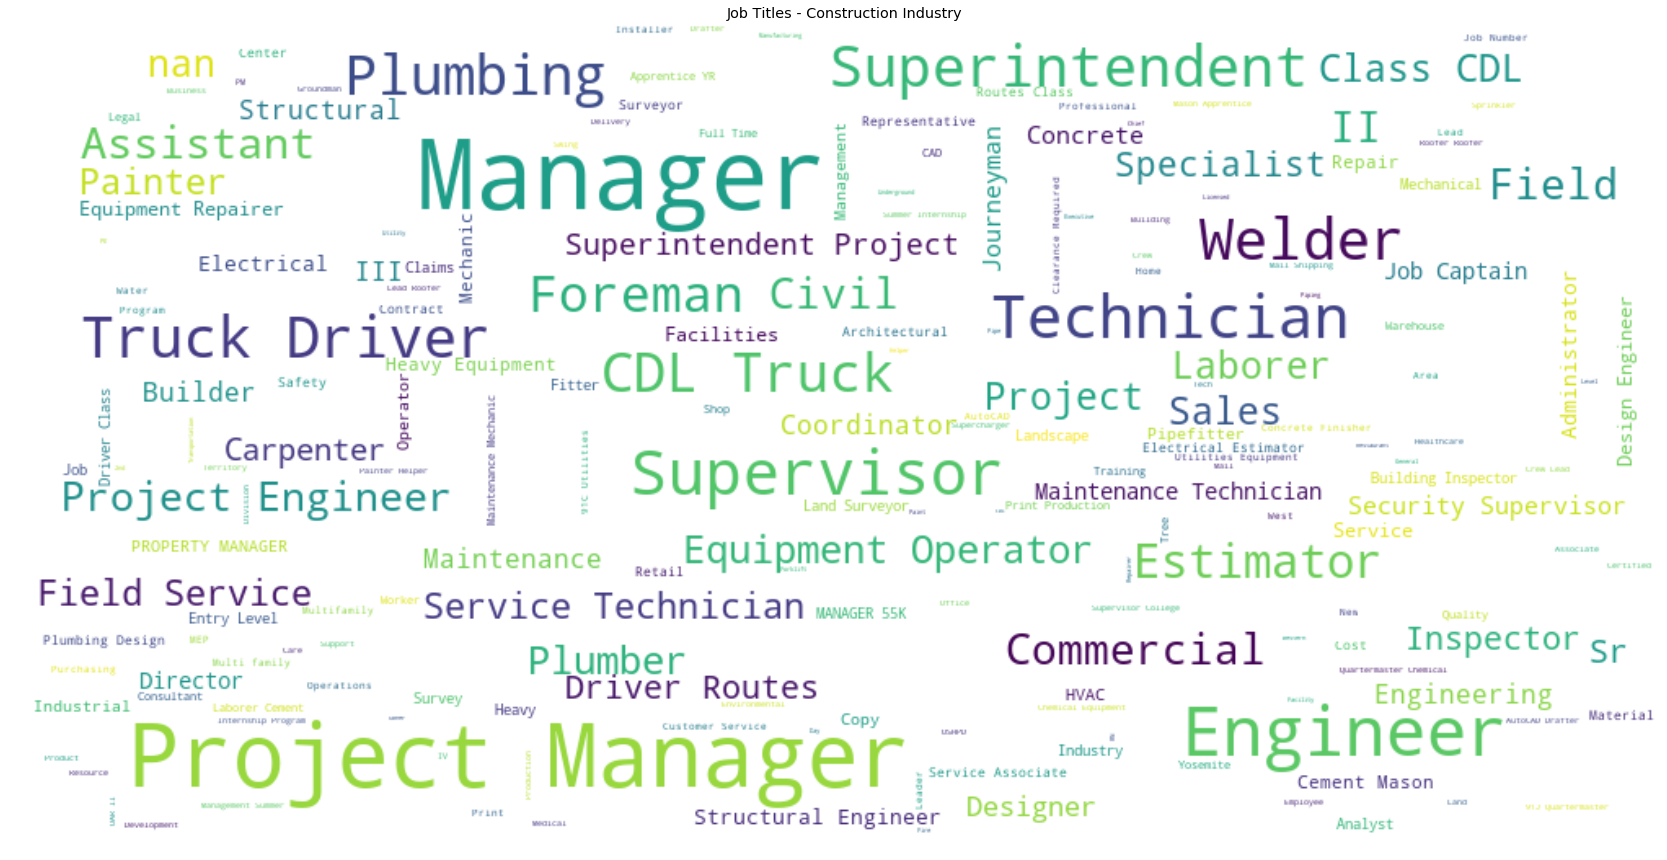

In [37]:
#job titles word clouds
#generating positive reviews word cloud
Job_title_words = ' '.join(str(jt) for jt in df_jobs['Job_name'])

more_stopwords = {'Construction', 'Los Angeles', '91D', 'Angeles', 'Santa', 'Los', 'Hollywood', 'Anaheim', 'Monica', 'Needed', 'LAX',
                 'United', 'Relocation', 'Residential', 'Site', 'company', 'luxury', 'Openings', 'Custom', 'Immediate', 'High', 'Mig', 
                  'Guitar', 'Parking', 'Amazing', 'Top', 'End', 'San', 'Shift', 'CA' , 'Fe','LA','Mixed','Jose', 'Fresno', 'Great', 
                  'Pay', 'California', 'Sacramento', 'Senior', 'Diego', 'Francisco'
                  
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
Job_title_cleaned_tags = " ".join([word for word in Job_title_words.split()
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_title_cleaned_tags)
plt.figure( figsize=(30,15) )
plt.title('Job Titles - Construction Industry')
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.figure(figsize=(1000,1000))
#plt.show()
plt.savefig('wordcloud_job_titles_construction_industries.jpeg', bbox_inches='tight')

In [45]:
from nltk.stem import PorterStemmer

In [46]:
porter = PorterStemmer()

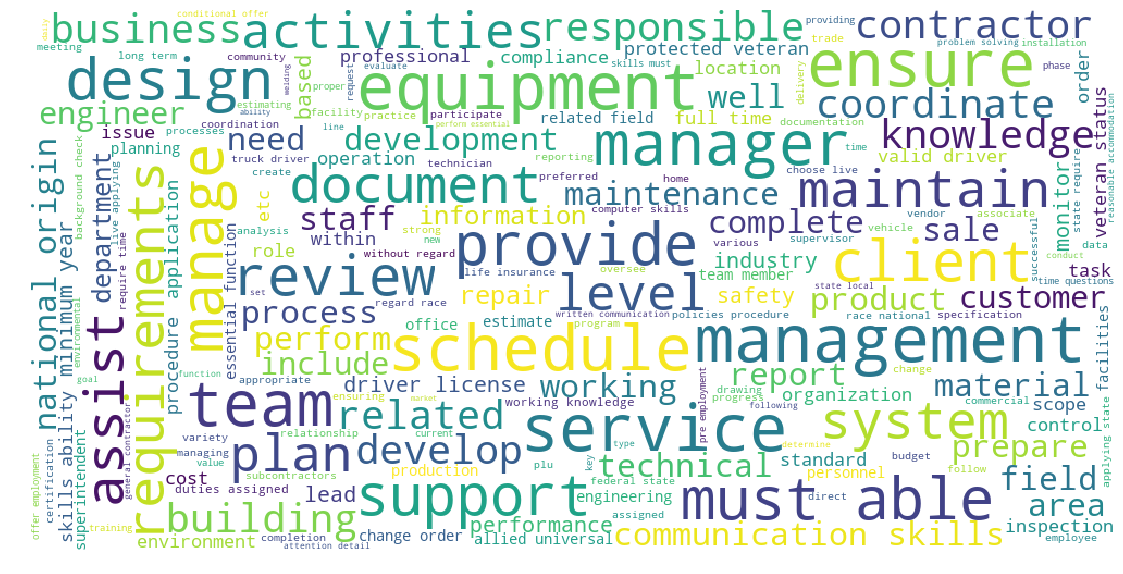

<Figure size 432x288 with 0 Axes>

In [47]:
#job titles word clouds
#generating positive reviews word cloud
Job_desc_words = ' '.join(porter.stem(str(jd)) for jd in df_jobs['Job_description'])

for word in Job_desc_words:
    re.sub(r'[^\w\s]','',word)


more_stopwords = {'sexual orientation', 'contract', 'bachelor', 'degree', 'necessary', 'religion' , 'color', 'looking', 'applicants', 
                  'required', 'use', 'responsibilities', 'experience', 'dental', 'vision', 'orientation', 'sexual', 'California'
                  'opportunities', 'Equal', 'opportunity', 'customer', 'work', 'project', 'including', 'requirement', 'will',
                  'projects', 'position', 'subcontractor', 'gender', 'identity', 'school', 'diploma', 'good', 
                  'job', 'description', 'asked', 'criminal', 'history', 'hiring', 'asked', 'answer', 'apply', 'race,',
                  'color,', 'religion,', 'sex', 'andor'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
Job_desc_cleaned_tags = " ".join([word for word in Job_desc_words.split()
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_desc_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_job_desc.png', bbox_inches='tight')

In [48]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
from nltk.tokenize import *

In [49]:
Job_desc_stopwords_cleaned = " ".join([word for word in Job_desc_words.split() if word.lower() not in STOPWORDS and len(word)>3
                            ])

In [50]:
Job_desc_stopwords_punc_cleaned = " ".join([re.sub(r'[^\w\s]','',word) for word in Job_desc_stopwords_cleaned.split() if word not in STOPWORDS
                            ])

In [51]:
#frequency distribution of positive reviews
long_words = [w.lower() for w in Job_desc_stopwords_punc_cleaned.split()]
fdist1 = FreqDist(long_words)
fdist1.most_common(50)

[('construction', 3821),
 ('ability', 1992),
 ('management', 1899),
 ('must', 1735),
 ('skills', 1655),
 ('equipment', 1489),
 ('team', 1462),
 ('years', 1434),
 ('safety', 1237),
 ('requirements', 1138),
 ('knowledge', 1137),
 ('service', 1118),
 ('manager', 1063),
 ('time', 978),
 ('engineering', 944),
 ('design', 939),
 ('quality', 914),
 ('duties', 905),
 ('ensure', 900),
 ('working', 871),
 ('employees', 864),
 ('site', 864),
 ('able', 858),
 ('training', 850),
 ('services', 833),
 ('field', 819),
 ('related', 810),
 ('provide', 771),
 ('andor', 765),
 ('benefits', 762),
 ('employment', 755),
 ('systems', 725),
 ('perform', 723),
 ('maintain', 718),
 ('maintenance', 713),
 ('preferred', 704),
 ('business', 687),
 ('environment', 681),
 ('responsible', 670),
 ('required', 661),
 ('high', 656),
 ('building', 653),
 ('support', 651),
 ('include', 650),
 ('information', 641),
 ('development', 639),
 ('procedures', 639),
 ('reports', 638),
 ('minimum', 612),
 ('experience', 612)]

In [53]:
fdist2= FreqDist(nltk.ngrams(Job_desc_stopwords_punc_cleaned.split(),2))
fdist2.most_common(300)

[(('must', 'able'), 511),
 (('construction', 'management'), 422),
 (('communication', 'skills'), 302),
 (('equal', 'employer'), 291),
 (('construction', 'manager'), 254),
 (('national', 'origin'), 243),
 (('drivers', 'license'), 232),
 (('minimum', 'years'), 226),
 (('veteran', 'status'), 201),
 (('duties', 'assigned'), 189),
 (('skills', 'ability'), 181),
 (('united', 'states'), 172),
 (('valid', 'drivers'), 170),
 (('essential', 'functions'), 168),
 (('working', 'knowledge'), 161),
 (('without', 'regard'), 158),
 (('related', 'field'), 155),
 (('policies', 'procedures'), 154),
 (('computer', 'skills'), 142),
 (('design', 'construction'), 135),
 (('life', 'insurance'), 131),
 (('andor', 'applying'), 130),
 (('allied', 'universal'), 127),
 (('truck', 'drivers'), 124),
 (('team', 'members'), 123),
 (('protected', 'veteran'), 123),
 (('applying', 'state'), 122),
 (('choose', 'answer'), 121),
 (('answer', 'live'), 121),
 (('live', 'andor'), 121),
 (('state', 'require'), 121),
 (('require'

In [54]:
import re
##s = 'vision,'
##s = re.sub(r'[^\w\s]','',s)
#s

In [55]:
with open("bigrams_skills_raw_data_construction_industry.csv", "w") as fp:
    writer = csv.writer(fp, quoting=csv.QUOTE_ALL)
    writer.writerows(fdist2.most_common(300))

In [56]:
count_words=0
for w in Job_desc_stopwords_punc_cleaned.split():
    count_words = count_words+1
print(count_words)

306829


In [57]:
df_bigrams=pd.read_csv('bigrams_skills_cleaned_labelled_manually_construction_industry.csv')

In [58]:
df_bigrams.head()

Bigram  Frequency       Label
0  construction management        422  Hard Skill
1     communication skills        302  Soft Skill
2          duties assigned        189  Soft Skill
3            valid drivers        170  Hard Skill
4      policies procedures        154  Soft Skill

In [59]:
df_hardskills = df_bigrams[df_bigrams['Label']=='Hard Skill']

In [60]:
len(df_hardskills)

193

In [61]:
df_hardskills.head()

Bigram  Frequency       Label
0  construction management        422  Hard Skill
3            valid drivers        170  Hard Skill
5          computer skills        142  Hard Skill
6      design construction        135  Hard Skill
9        perform essential        105  Hard Skill

In [62]:
df_hardskills.reset_index(inplace=True)

In [63]:
df_hardskills.head()

index                   Bigram  Frequency       Label
0      0  construction management        422  Hard Skill
1      3            valid drivers        170  Hard Skill
2      5          computer skills        142  Hard Skill
3      6      design construction        135  Hard Skill
4      9        perform essential        105  Hard Skill

In [64]:
df_hardskills.drop(df_hardskills.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
df_hardskills.head()

Bigram  Frequency       Label
0  construction management        422  Hard Skill
1            valid drivers        170  Hard Skill
2          computer skills        142  Hard Skill
3      design construction        135  Hard Skill
4        perform essential        105  Hard Skill

In [66]:
df_hardskills.drop(df_hardskills.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
df_hardskills.head()

Bigram  Frequency
0  construction management        422
1            valid drivers        170
2          computer skills        142
3      design construction        135
4        perform essential        105

In [68]:
##top 50 hardskills
df_hardskills_50 = df_hardskills.head(50)

In [69]:
##top 25 hardskills
df_hardskills_25 = df_hardskills.head(25)

In [70]:
word_dict={}

In [71]:
word_dict=pd.Series(df_hardskills.Frequency.values,index=df_hardskills.Bigram).to_dict()

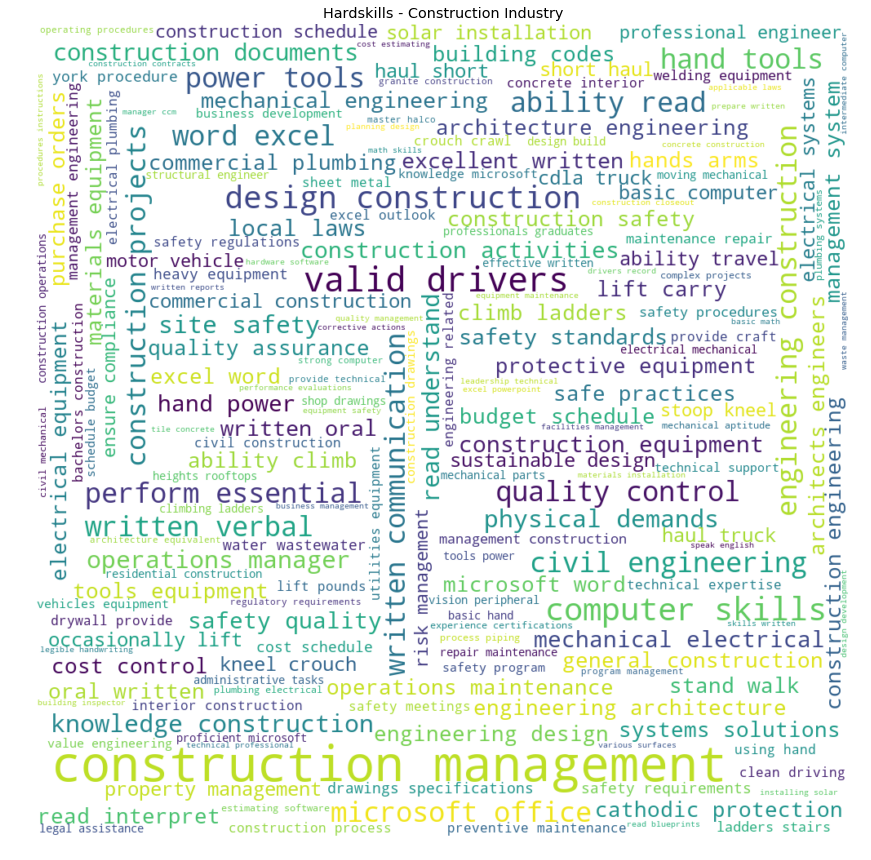

In [73]:

wordCloud = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud.generate_from_frequencies(word_dict)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Hardskills - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [74]:
word_dict_hs_50=pd.Series(df_hardskills_50.Frequency.values,index=df_hardskills_50.Bigram).to_dict()

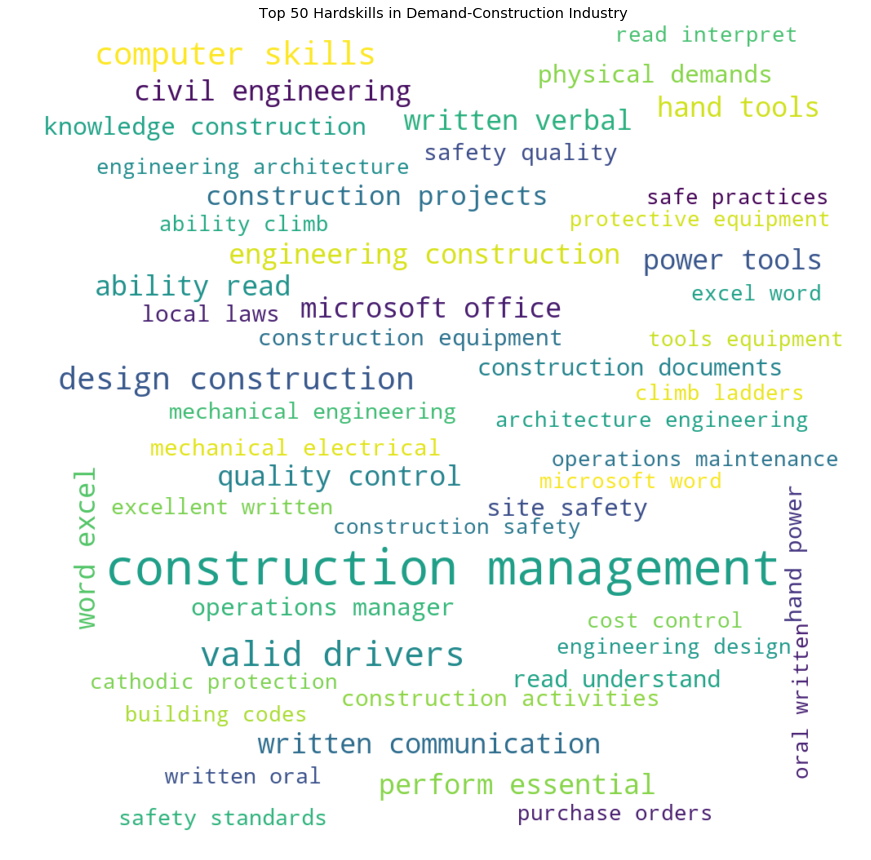

In [75]:
wordCloud_hs_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_50.generate_from_frequencies(word_dict_hs_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Hardskills in Demand-Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_top_50_demand_side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [76]:
word_dict_hs_25=pd.Series(df_hardskills_25.Frequency.values,index=df_hardskills_25.Bigram).to_dict()

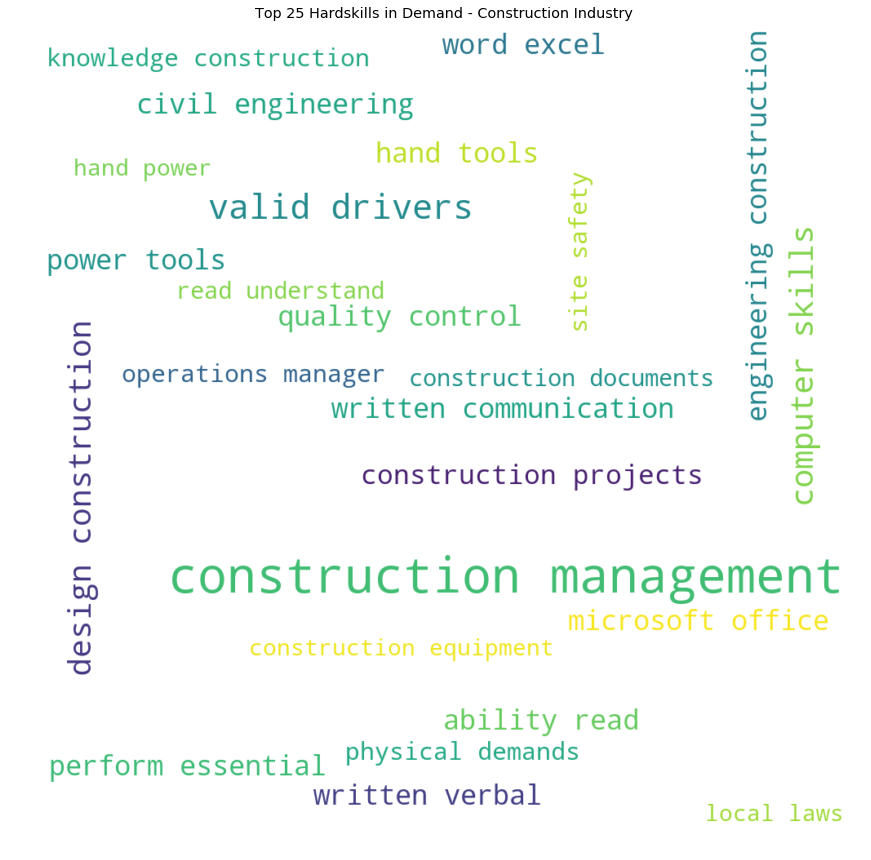

In [77]:
wordCloud_hs_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_25.generate_from_frequencies(word_dict_hs_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Hardskills in Demand - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_top_25_Demand_Side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [72]:
df_softskills = df_bigrams[df_bigrams['Label']=='Soft Skill']

In [73]:
df_softskills.reset_index(inplace=True)

In [74]:
df_softskills.head()

index                Bigram  Frequency       Label
0      1  communication skills        302  Soft Skill
1      2       duties assigned        189  Soft Skill
2      4   policies procedures        154  Soft Skill
3     11      attention detail        103  Soft Skill
4     12         timely manner        102  Soft Skill

In [75]:
df_softskills.drop(df_softskills.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [76]:
df_softskills.drop(df_softskills.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [77]:
df_softskills.head()

Bigram  Frequency
0  communication skills        302
1       duties assigned        189
2   policies procedures        154
3      attention detail        103
4         timely manner        102

In [78]:
df_softskills_50 = df_softskills.head(50)

In [79]:
df_softskills_25 = df_softskills.head(25)

In [80]:
word_dict_ss=pd.Series(df_softskills.Frequency.values,index=df_softskills.Bigram).to_dict()

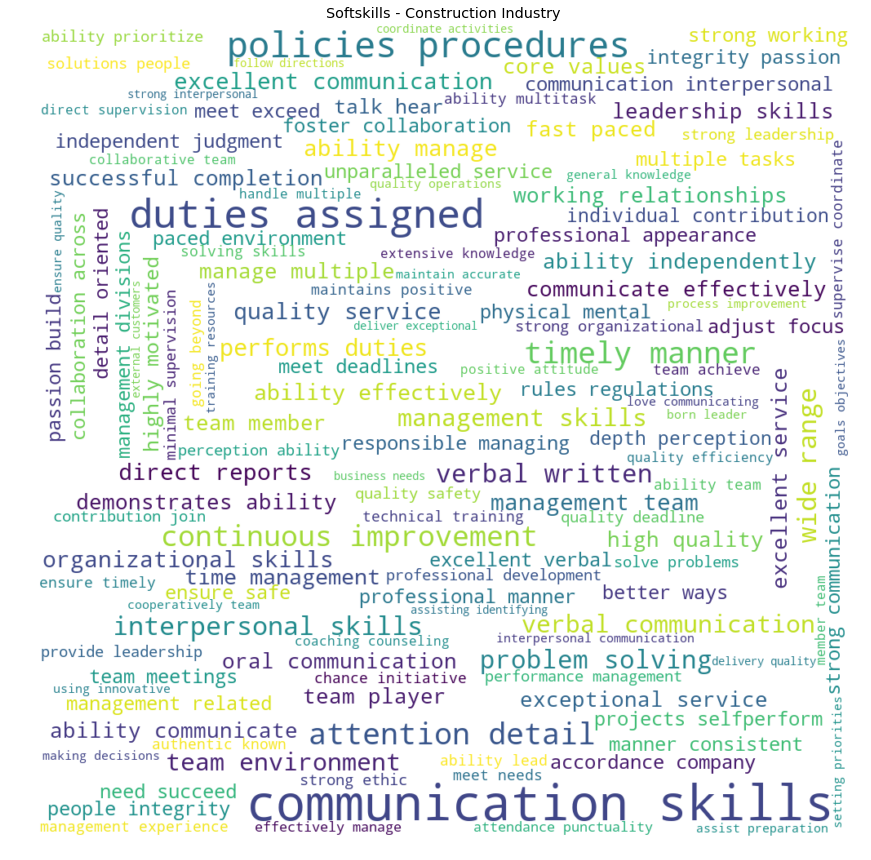

In [81]:
wordCloud_ss = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss.generate_from_frequencies(word_dict_ss)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss, interpolation = 'bilinear')
plt.axis('off')
plt.title('Softskills - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Softskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")
 

In [82]:
word_dict_ss_50=pd.Series(df_softskills_50.Frequency.values,index=df_softskills_50.Bigram).to_dict()

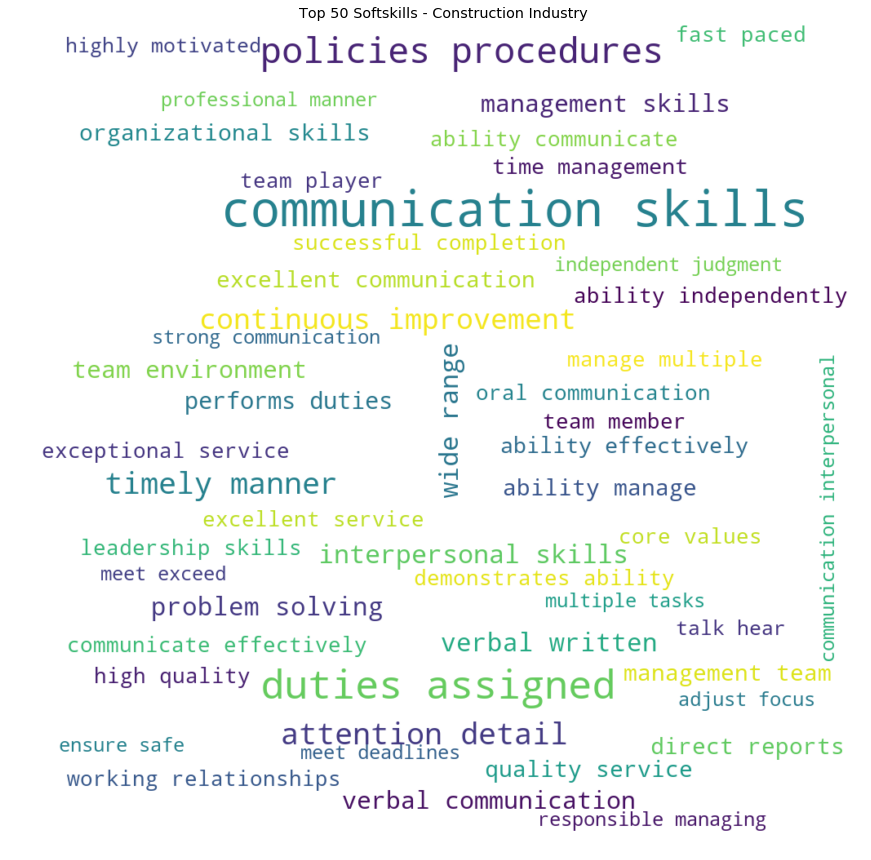

In [83]:
wordCloud_ss_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss_50.generate_from_frequencies(word_dict_ss_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Softskills - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Softskills_top50_words.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")
 

In [84]:
word_dict_ss_25=pd.Series(df_softskills_25.Frequency.values,index=df_softskills_25.Bigram).to_dict()

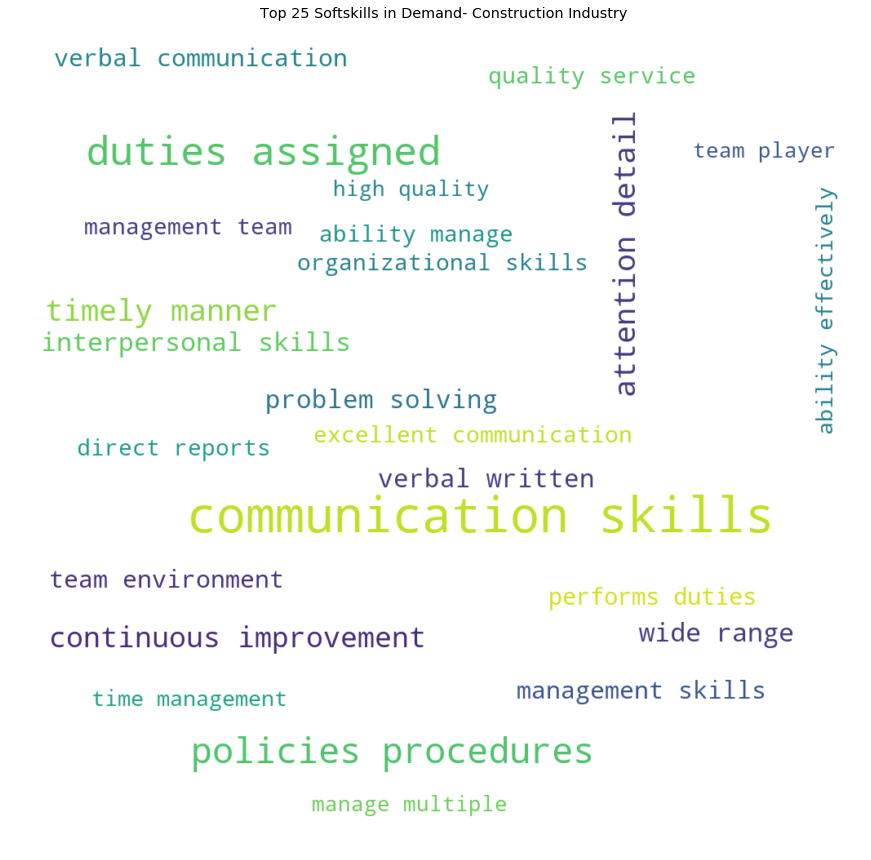

In [85]:
wordCloud_ss_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss_25.generate_from_frequencies(word_dict_ss_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Softskills in Demand- Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Softskills_top25_Demand_side.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")

In [78]:
df_benefits = df_bigrams[df_bigrams['Label']=='Benefits']

In [79]:
df_benefits.reset_index(inplace=True)

In [80]:
df_benefits.drop(df_benefits.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [81]:
df_benefits.drop(df_benefits.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [82]:
df_benefits.head()

Bigram  Frequency
0    life insurance        131
1    medical dental        116
2     dental vision         92
3  benefits package         92
4     paid holidays         86

In [83]:
df_benefits_50 = df_benefits.head(50)

In [84]:
df_benefits_25 = df_benefits.head(25)

In [85]:
word_dict_b_50=pd.Series(df_benefits_50.Frequency.values,index=df_benefits_50.Bigram).to_dict()

In [86]:
word_dict_b_25=pd.Series(df_benefits_25.Frequency.values,index=df_benefits_25.Bigram).to_dict()

In [87]:
word_dict_b=pd.Series(df_benefits.Frequency.values,index=df_benefits.Bigram).to_dict()

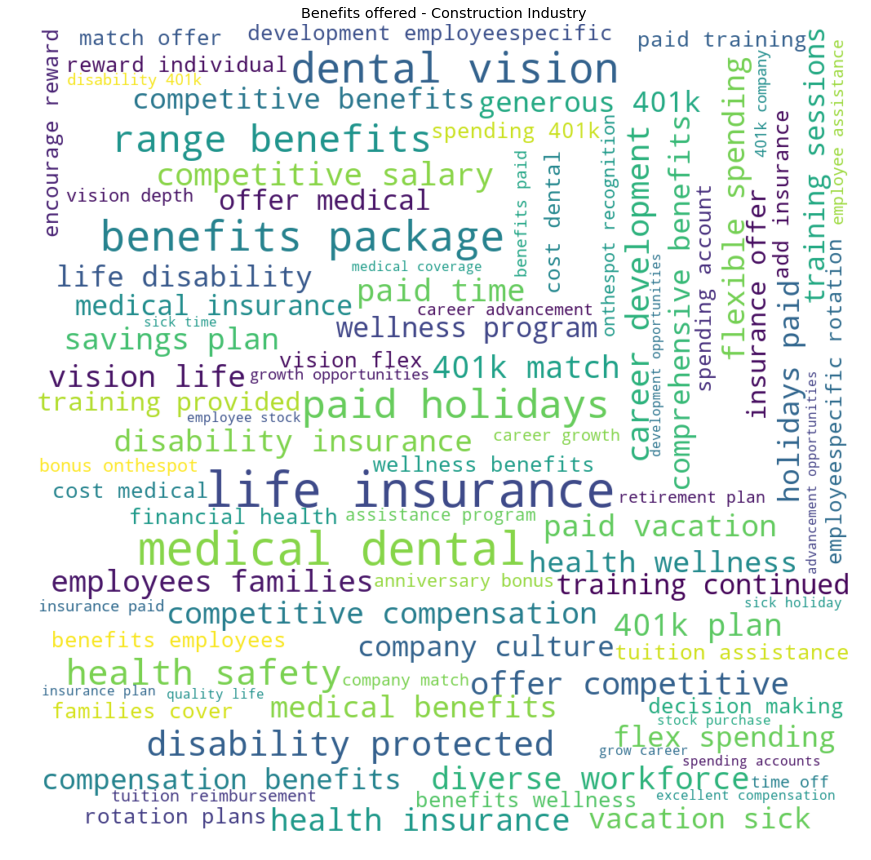

In [88]:
wordCloud_b = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b.generate_from_frequencies(word_dict_b)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b, interpolation = 'bilinear')
plt.axis('off')
plt.title('Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")
 

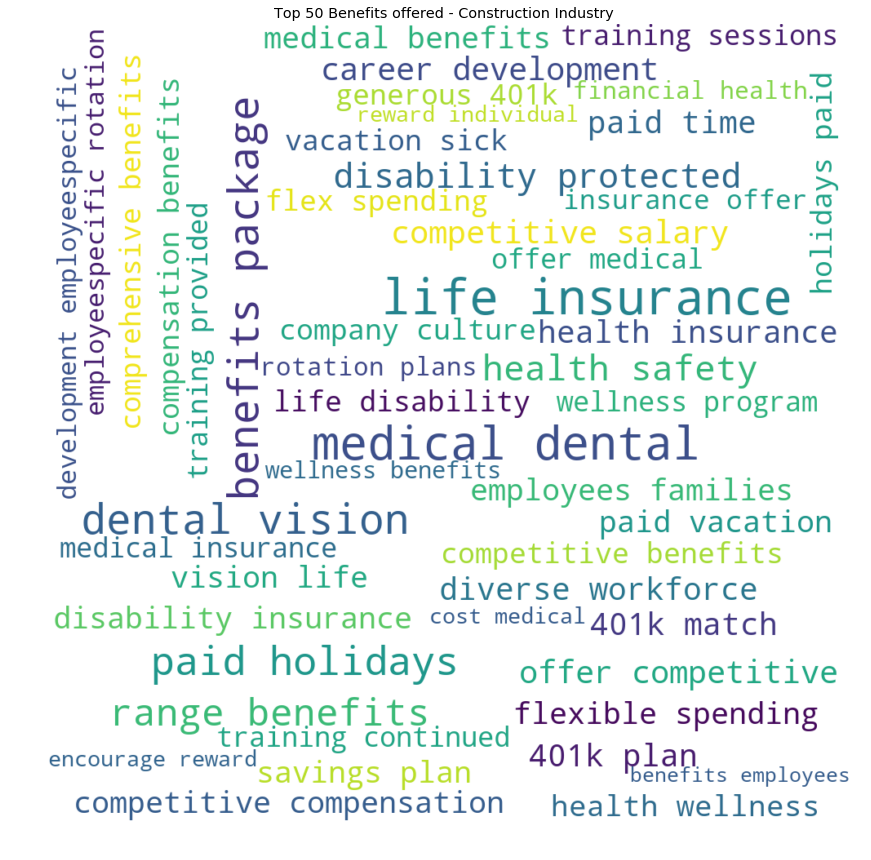

In [103]:
wordCloud_b_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b_50.generate_from_frequencies(word_dict_b_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_50_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")

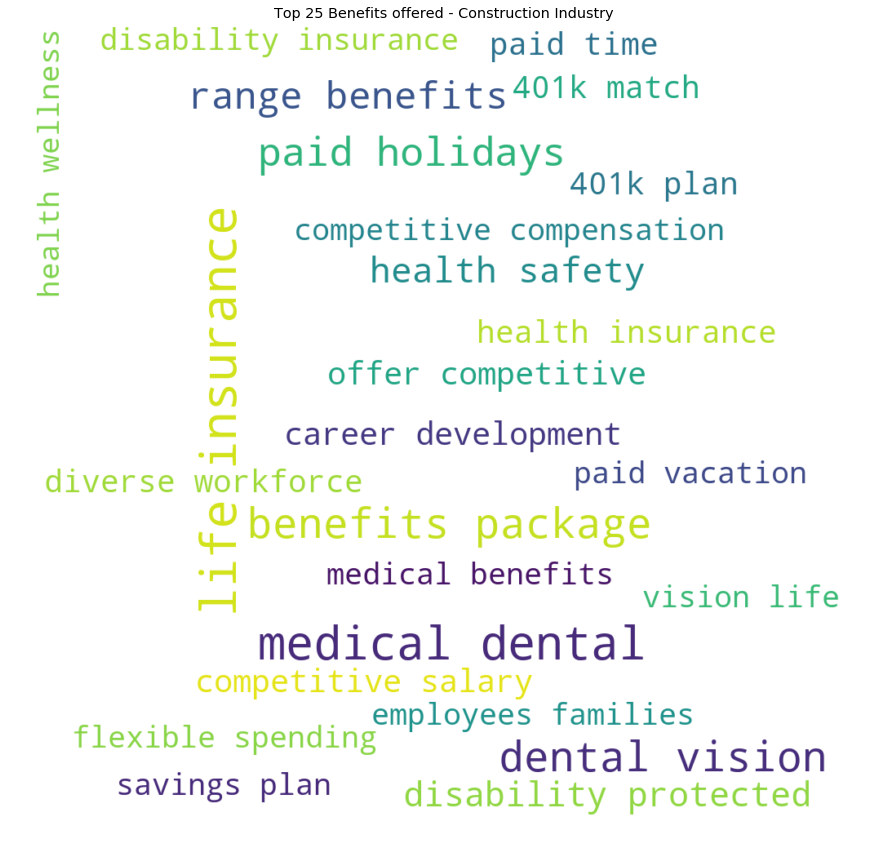

In [89]:
wordCloud_b_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b_25.generate_from_frequencies(word_dict_b_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_25_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")

In [104]:
df_exp = df_bigrams[df_bigrams['Label']=='Experience Level']

In [105]:
df_exp.head()

Bigram  Frequency             Label
32             five years         72  Experience Level
44      experience please         61  Experience Level
63    seeking experienced         52  Experience Level
70            three years         50  Experience Level
85  combination education         47  Experience Level

In [106]:
df_exp.reset_index(inplace=True)

In [107]:
df_exp.drop(df_exp.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [108]:
df_exp.drop(df_exp.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [109]:
word_dict_e=pd.Series(df_exp.Frequency.values,index=df_exp.Bigram).to_dict()

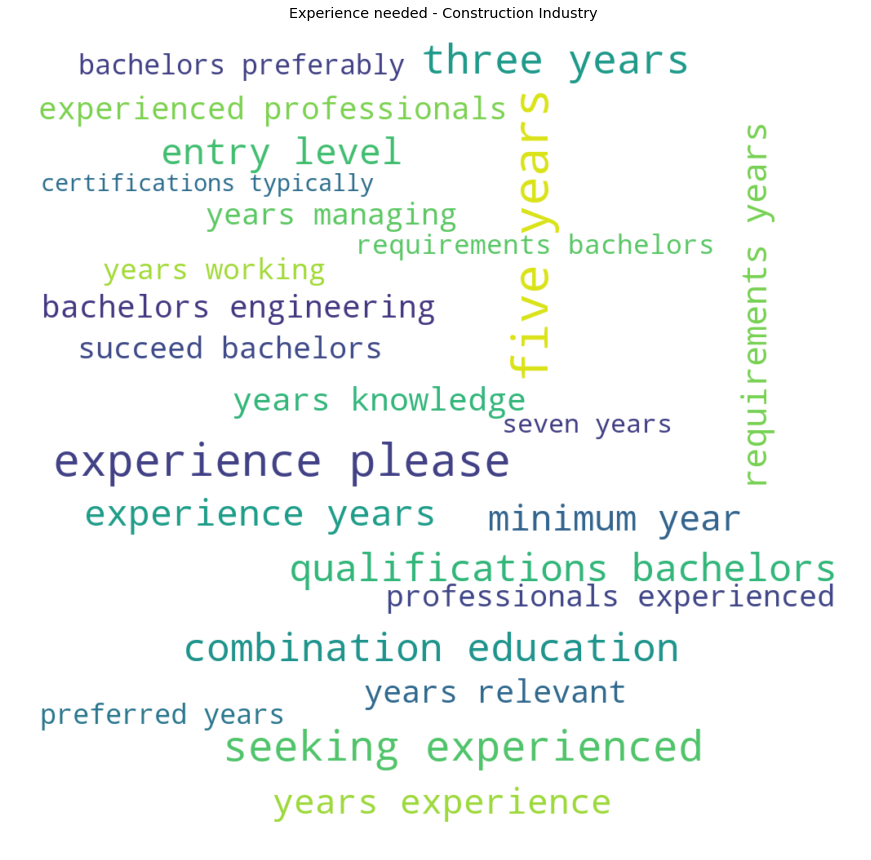

In [110]:
wordCloud_e = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_e.generate_from_frequencies(word_dict_e)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_e, interpolation = 'bilinear')
plt.axis('off')
plt.title('Experience needed - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Experience_frequent_words.png', bbox_inches='tight')  
#wordCloud.to_file("Experience_frequent_words.png")
 